## 8.24

Consider univariate AR(1) models $Z_t = c _ \phi Z_{t-1} + \epsilon_t$, where $\epsilon_t \sim \mathcal{N}(0,1/4)$

Simulate and plot time series for $ t \in \{0,...,50\}$

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm


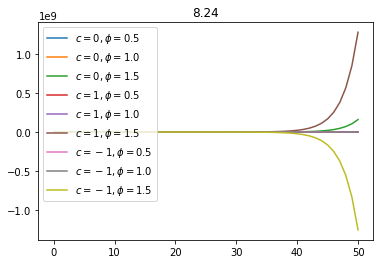

In [20]:
cs = [0,1,-1]
phis = [0.5,1.0,1.5]
domain = np.arange(51)

for c in cs:
    for phi in phis:
        Z = [0]
        for _ in range(50):
            Z.append(c + phi * Z[-1] + np.random.randn() / 4)
        plt.plot(domain,Z,label="$c = {}, \phi = {}$".format(c,phi))

plt.title("8.24")
plt.legend(loc="upper left")
plt.show()
        

## 8.25
Consider univariate AR(2) model now

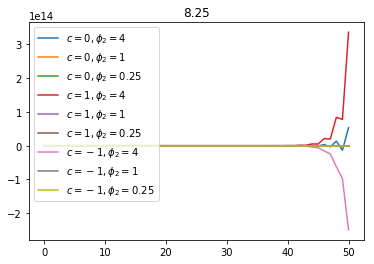

In [22]:
phis = [4,1,1/4]

for c in cs:
    for phi in phis:
        Z = [0,0]
        for _ in range(49):
            Z.append(c + phi * Z[-2] + np.random.randn() / 4)
        plt.plot(domain,Z,label="$c = {}, \phi_2 = {}$".format(c,phi))

plt.title("8.25")
plt.legend(loc="upper left")
plt.show()


## 8.26
Now consider univariate MA(1) models of the form $Z_t = c + \epsilon_t + \theta_1 \epsilon_{t-1}$. 

c = 0, theta = 1
0 : 0.9999999999999999
1 : 0.5784832610809342
2 : 0.10954158515969213
3 : 0.09398381741322243
4 : 0.20573940572593355
5 : 0.17689704245125473
6 : -0.06548612566224038
7 : -0.22738226759678304
8 : -0.0793488637650997
9 : 0.08636525253915309
10 : 0.018941114501916094

c = 0, theta = 2
0 : 0.9999999999999998
1 : 0.4879249515333713
2 : 0.01812341480365628
3 : -0.11133849752053387
4 : -0.015569624200687613
5 : 0.017485937893548076
6 : -0.16931699107368525
7 : -0.09857125244559457
8 : -0.02820353882270492
9 : 0.08671135139975225
10 : 0.050771794981586266

c = 0, theta = 0.5
0 : 1.0
1 : 0.3126080068453474
2 : -0.16563291131660068
3 : -0.0342733328771299
4 : -0.15346667362986044
5 : -0.11474529212834353
6 : -0.10803086718400168
7 : -0.3118863264943469
8 : -0.14624916758116702
9 : 0.04045607321208138
10 : -0.03794499248995537

c = 1, theta = 1
0 : 1.0
1 : 0.6388165607060579
2 : 0.12039051644452652
3 : -0.13754066395645856
4 : -0.21687647915967878
5 : -0.2858316378974583
6 : -0.

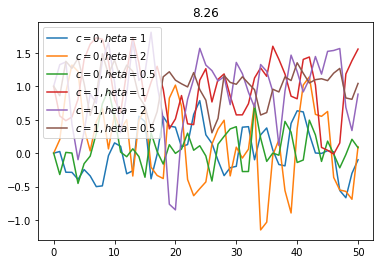

In [35]:
cs = [0,1]
thetas = [1,2,1/2]

for c in cs:
    for theta in thetas:
        Z = [c]
        e_last = np.random.randn() / 4
        for _ in range(50):
            e = np.random.randn() / 4
            Z.append( c + e +  theta * e_last )
            e_last = e
        plt.plot(Z,label="$c = {}, \theta = {}$".format(c,theta))
        
        df = pd.Series(Z)
        cov = [df.autocorr(i) for i in range(11)]
        
        print("c = {}, theta = {}".format(c,theta))
        for i,a in enumerate(cov):
            print(i, ":", a)
        print()
        
plt.title("8.26")
plt.legend(loc="upper left")
plt.show()

It looks like the correlations are sampled from a mean zero distribution, as stated in Theorem 8.6.8

## 8.27

Prove theorem 8.6.8. Is the theorem still true if the time series starts at time $t = 0$ instead of running over all $ t \in \mathbb{Z}$? Why or why not?



Every MA(q) process is covariance stationary, and $\mu(t) = c, \gamma_k(t) = \sum_{j=0}^{q-k}\Phi_{j+k}\Sigma \Phi_j^T$ for $0 \geq k \geq q$, $\gamma_k(t) = 0$ for $q < k$ where $\Phi_0 = 1$.

$\mu(t) = \mathbb{E}[Z_t] = \mathbb{E}[c + \epsilon_t + \Phi_1 \epsilon_{t-1} + ... + \Phi_q \epsilon_{t-q}] = c + 0 +\ ...\ + 0 = c$

$\gamma_k(t) = Cov(Z_t,Z_{t-k}) = Cov(c + \epsilon_t + ... + \Phi_q \epsilon_{t-q}, c + \epsilon_{t-k} + \Phi_{q} \epsilon_{t-k-q})  = \sum_{j=0}^{q-k} \Phi_{j+k} \Sigma \Phi_j^T$ for $0 \leq k \leq q$, ($ = 0$ for $q < k$)

This still applies for t starting at 0 as long as the epsilons are all defined for all the $\gamma_k$ in question.

## 8.28

$z_t = T_t + S_t + R_t $

In [70]:
data = pd.read_csv("2015-PM2.5.csv",index_col=0)
provo = data["NP"]
provo = pd.to_numeric(provo, errors="coerce").dropna()

lag1 = provo.shift(1)
lag2 = provo.shift(2)
A = np.column_stack((lag1,lag2,np.ones_like(lag1)))

model = sm.OLS(provo[2:], A[2:])
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     NP   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     8786.
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:26:14   Log-Likelihood:                -23379.
No. Observations:                8510   AIC:                         4.676e+04
Df Residuals:                    8507   BIC:                         4.679e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8020      0.011     73.995      0.0

In [74]:
for i in [1,2,3]:
    diff_i = provo.diff(i).dropna()
    lag1 = diff_i.shift(1)
    lag2 = diff_i.shift(2)
    A = np.column_stack((lag1,lag2,np.ones_like(lag1)))
    model = sm.OLS(diff_i[2:], A[2:])
    results = model.fit()
    print()
    print("Diff 1:")
    print(results.summary())
    


Diff 1:
                            OLS Regression Results                            
Dep. Variable:                     NP   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          3.50e-125
Time:                        18:29:23   Log-Likelihood:                -23493.
No. Observations:                8509   AIC:                         4.699e+04
Df Residuals:                    8506   BIC:                         4.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1359      0.011    -12.882

By comparing the $R^2$ values, it looks like the best regression was with the AR(2) model on $\Delta_1 z_t$. 